# CIE_4140_Lecture_3_4_Python #

## Integral Fourier Transform and frequency-domain analysis ##

In [120]:
import sympy as sp

In [121]:
tau= sp.symbols('tau',real=True,positive = True)
t = sp.symbols('t',real=True)

Example Function of Time

In [125]:
f = sp.Heaviside(t-tau)-sp.Heaviside(t-2*tau)

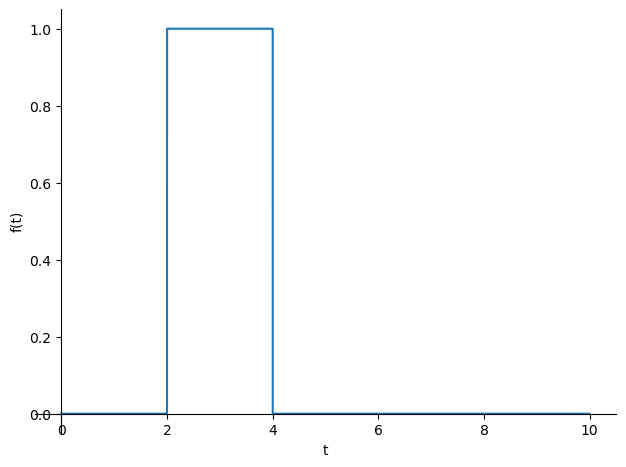

In [126]:
sp.plot(f.subs(tau,2),(t,0,10));

In [127]:
omega = sp.symbols('omega',real=True,positive=True)
phi = sp.symbols('phi',real=True,positive=True)
f_omega = sp.integrate(f*sp.exp(-sp.I*omega*t), (t,-sp.oo,sp.oo))
f_phi = sp.fourier_transform(f,t,phi) 
f_omega = sp.simplify(f_omega)
f_phi = sp.simplify(f_phi)
display(f_omega)
display(f_phi)

I*(1 - exp(I*omega*tau))*exp(-2*I*omega*tau)/omega

I*(1 - exp(2*I*pi*phi*tau))*exp(-4*I*pi*phi*tau)/(2*pi*phi)

Another definition for the fourier transformation is used by sympy

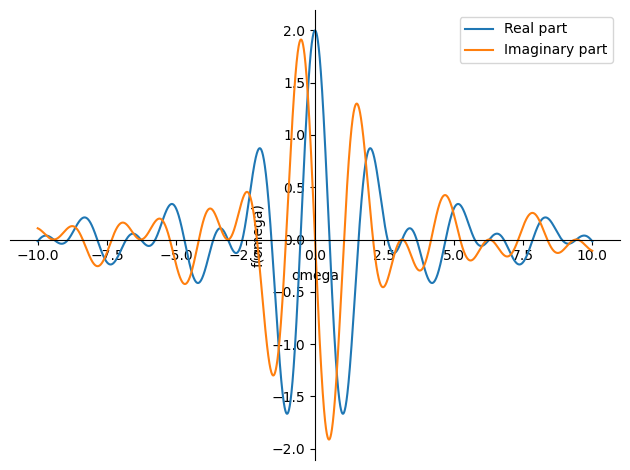

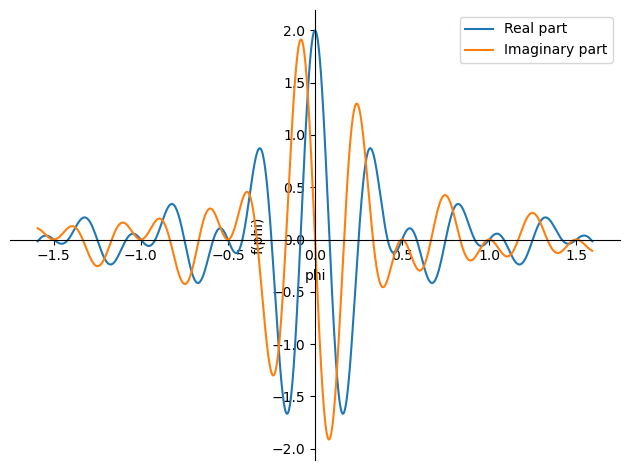

In [128]:
p0 = sp.plotting.plot(sp.re(f_omega.subs([(tau,2)])),(omega,-10,10),label='Real part' ,legend=True,show=False,adaptive=False,nb_of_points=3000)
p1 = sp.plotting.plot(sp.im(f_omega.subs([(tau,2)])),(omega,-10,10),label='Imaginary part',legend=True,show=False,adaptive=False,nb_of_points=3000)
p0.append(p1[0])
p0.show()
p0 = sp.plotting.plot(sp.re(f_phi.subs([(tau,2)])),(phi,-10/2/sp.pi,10/2/sp.pi),label='Real part' ,legend=True,show=False,adaptive=False,nb_of_points=3000)
p1 = sp.plotting.plot(sp.im(f_phi.subs([(tau,2)])),(phi,-10/2/sp.pi,10/2/sp.pi),label='Imaginary part',legend=True,show=False,adaptive=False,nb_of_points=3000)
p0.append(p1[0])
p0.show()

In [129]:
x = sp.symbols('x',cls = sp.Function)
m, c, k = sp.symbols('m, c, k',real=True,positive=True)
Equation_of_Motion = m*sp.diff(x(t),t,2)+c*sp.diff(x(t),t)+k*x(t)-f
display(Equation_of_Motion)

c*Derivative(x(t), t) + k*x(t) + m*Derivative(x(t), (t, 2)) + Heaviside(t - 2*tau) - Heaviside(t - tau)

In [130]:
sp.fourier_transform(Equation_of_Motion,t,phi)

TypeError: Invalid comparison of non-real zoo

So Homogeneous equation of motion cannot be Fourier transformed

In [131]:
Equation_of_Motion_in_frequency_domain_homogeneous = sp.fourier_transform(m*sp.diff(x(t),t,2)+c*sp.diff(x(t),t)+k*x(t),t,phi)
Equation_of_Motion_in_frequency_domain = Equation_of_Motion_in_frequency_domain_homogeneous - f_phi
display(Equation_of_Motion_in_frequency_domain)

c*FourierTransform(Derivative(x(t), t), t, phi) + k*FourierTransform(x(t), t, phi) + m*FourierTransform(Derivative(x(t), (t, 2)), t, phi) - I*(1 - exp(2*I*pi*phi*tau))*exp(-4*I*pi*phi*tau)/(2*pi*phi)

Derivatives of ${d \over {dt}}x\left( t \right)$ not evaluated

In [132]:
Equation_of_Motion_in_frequency_domain = Equation_of_Motion_in_frequency_domain.subs(sp.fourier_transform(x(t).diff(t),t,phi),-sp.I*c*2*sp.pi*phi*sp.fourier_transform(x(t),t,phi))
Equation_of_Motion_in_frequency_domain = Equation_of_Motion_in_frequency_domain.subs(sp.fourier_transform(x(t).diff(t,2),t,phi),(-sp.I*c*2*sp.pi*phi)**2*sp.fourier_transform(x(t),t,phi))
display(Equation_of_Motion_in_frequency_domain)

-4*pi**2*c**2*m*phi**2*FourierTransform(x(t), t, phi) - 2*I*pi*c**2*phi*FourierTransform(x(t), t, phi) + k*FourierTransform(x(t), t, phi) - I*(1 - exp(2*I*pi*phi*tau))*exp(-4*I*pi*phi*tau)/(2*pi*phi)

In [133]:
solution_in_frequency_domain = sp.solve(sp.Eq(Equation_of_Motion_in_frequency_domain,0),sp.FourierTransform(x(t), t, phi))[0]
display(solution_in_frequency_domain)

I*(exp(2*I*pi*phi*tau) - 1)*exp(-4*I*pi*phi*tau)/(2*pi*phi*(4*pi**2*c**2*m*phi**2 + 2*I*pi*c**2*phi - k))

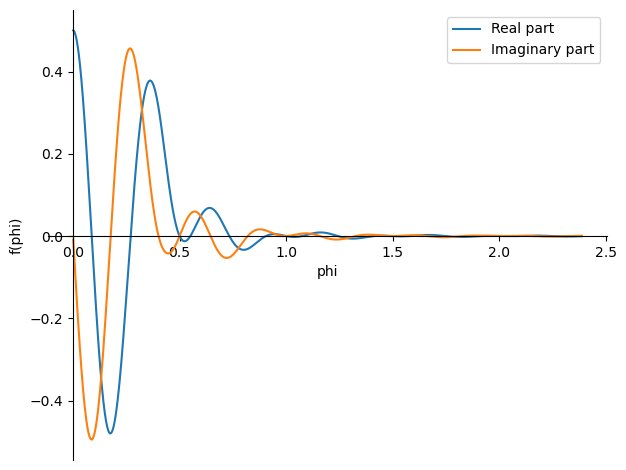

In [134]:
p0 = sp.plotting.plot(sp.re(solution_in_frequency_domain.subs([(tau,2),(k,4),(m,1),(c,0.75)])),(phi,0.001,15/2/sp.pi),label='Real part' ,legend=True,show=False,adaptive=False,nb_of_points=3000)
p1 = sp.plotting.plot(sp.im(solution_in_frequency_domain.subs([(tau,2),(k,4),(m,1),(c,0.75)])),(phi,0.001,15/2/sp.pi),label='Imaginary part',legend=True,show=False,adaptive=False,nb_of_points=3000)
p0.append(p1[0])
p0.show()

In [135]:
solution = sp.inverse_fourier_transform(solution_in_frequency_domain, phi,t)
display(solution)

I*(InverseFourierTransform(1/(8*pi**3*c**2*m*phi**3*exp(2*I*pi*phi*tau) + 4*I*pi**2*c**2*phi**2*exp(2*I*pi*phi*tau) - 2*pi*k*phi*exp(2*I*pi*phi*tau)), phi, t) - InverseFourierTransform(1/(8*pi**3*c**2*m*phi**3*exp(4*I*pi*phi*tau) + 4*I*pi**2*c**2*phi**2*exp(4*I*pi*phi*tau) - 2*pi*k*phi*exp(4*I*pi*phi*tau)), phi, t))

Takes quite a while

In [115]:
solution_in_frequency_domain = solution
solution_in_frequency_domain_numeric = solution_in_frequency_domain.subs([(tau,2),(k,4),(m,1),(c,3/4)])
display(solution_in_frequency_domain_numeric)

I*(InverseFourierTransform(1/(4.5*pi**3*phi**3*exp(4*I*pi*phi) + 2.25*I*pi**2*phi**2*exp(4*I*pi*phi) - 8*pi*phi*exp(4*I*pi*phi)), phi, t) - InverseFourierTransform(1/(4.5*pi**3*phi**3*exp(8*I*pi*phi) + 2.25*I*pi**2*phi**2*exp(8*I*pi*phi) - 8*pi*phi*exp(8*I*pi*phi)), phi, t))

TypeError: Cannot convert expression to float

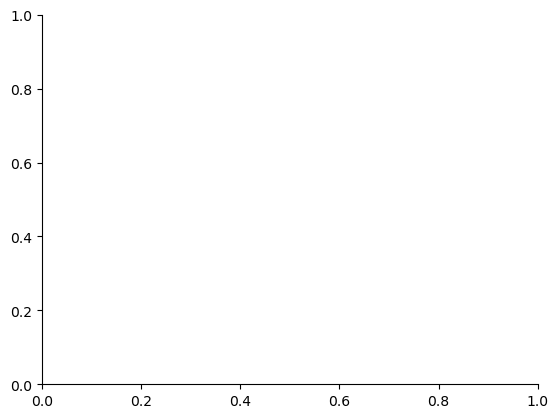

In [117]:
sp.plot(solution_in_frequency_domain_numeric,(t,0,15))

In [119]:
solution2 = sp.inverse_fourier_transform(sp.re(solution_in_frequency_domain), phi,t)
display(solution2)

KeyboardInterrupt: 